In [67]:
import pandas as pd

# Charger les fichiers CSV
df_geographie = pd.read_csv("operat_geographie_open_data.csv")  # Remplace par le chemin du fichier geographie
df_vecteurs = pd.read_csv("operat_open_data_vecteurs.csv")      # Remplace par le chemin du fichier vecteurs

print("Colonnes du df_geographie: ", df_geographie.columns.to_list())
print("Colonnes du df_vecteurs: ", df_geographie.columns.to_list())

# Obtenir les colonnes communes
colonnes_communes = set(df_geographie.columns).intersection(set(df_vecteurs.columns))

# Afficher les colonnes communes
print("Colonnes communes :", colonnes_communes)

Colonnes du df_geographie:  ['annee_consommation', 'zone_climatique', 'code_region', 'nom_region', 'code_departement', 'nom_departement', 'nom_commune', 'nombre_declaration', 'surface_declaree', 'consommation_declaree']
Colonnes du df_vecteurs:  ['annee_consommation', 'zone_climatique', 'code_region', 'nom_region', 'code_departement', 'nom_departement', 'nom_commune', 'nombre_declaration', 'surface_declaree', 'consommation_declaree']
Colonnes communes : {'nom_commune', 'nom_region', 'code_region', 'consommation_declaree', 'zone_climatique', 'nom_departement', 'annee_consommation', 'code_departement'}


In [68]:

# Fusion des DataFrames sur les colonnes communes
df_merged = pd.merge(
    df_geographie,
    df_vecteurs,
    on=["annee_consommation", "zone_climatique", "code_region", "code_departement", "nom_commune"],
    how="inner",
)

# Aperçu du DataFrame fusionné
print(df_merged.head())

# Optionnel : Sauvegarder le DataFrame fusionné en CSV
df_merged.to_csv("merged_geographie_vecteurs.csv", index=False)
print(df_merged.shape)

       annee_consommation zone_climatique code_region nom_region_x  \
0  0 - année de référence             GUA          01   Guadeloupe   
1  0 - année de référence             GUA          01   Guadeloupe   
2  0 - année de référence             GUA          01   Guadeloupe   
3  0 - année de référence             GUA          01   Guadeloupe   
4  0 - année de référence             GUA          01   Guadeloupe   

  code_departement nom_departement_x   nom_commune  nombre_declaration  \
0              971        Guadeloupe  BAIE MAHAULT                  86   
1              971        Guadeloupe       BAILLIF                   7   
2              971        Guadeloupe   BASSE TERRE                   4   
3              971        Guadeloupe    LES ABYMES                  34   
4              971        Guadeloupe   PETIT BOURG                  13   

   surface_declaree  consommation_declaree_x nom_region_y nom_departement_y  \
0            205643                 38442621   Guadelou

In [ ]:
# Suppression des colonnes redondantes
df_merged_cleaned = df_merged.drop(
    columns=["nom_region_y", "nom_departement_y", "consommation_declaree_y"]
)

# Renommer les colonnes pour clarification
df_merged_cleaned.rename(
    columns={
        "nom_region_x": "nom_region",
        "nom_departement_x": "nom_departement",
        "consommation_declaree_x": "consommation_declaree"
    },
    inplace=True
)

# Aperçu du DataFrame nettoyé
print(df_merged_cleaned.head())
print(df_merged_cleaned.shape)

# Sauvegarder le DataFrame fusionné nettoyé en CSV
df_merged_cleaned.to_csv("merged_geographie_vecteurs_cleaned.csv", index=False)

       annee_consommation zone_climatique code_region  nom_region  \
0  0 - année de référence             GUA          01  Guadeloupe   
1  0 - année de référence             GUA          01  Guadeloupe   
2  0 - année de référence             GUA          01  Guadeloupe   
3  0 - année de référence             GUA          01  Guadeloupe   
4  0 - année de référence             GUA          01  Guadeloupe   

  code_departement nom_departement   nom_commune  nombre_declaration  \
0              971      Guadeloupe  BAIE MAHAULT                  86   
1              971      Guadeloupe       BAILLIF                   7   
2              971      Guadeloupe   BASSE TERRE                   4   
3              971      Guadeloupe    LES ABYMES                  34   
4              971      Guadeloupe   PETIT BOURG                  13   

   surface_declaree  consommation_declaree vecteur_energie  
0            205643               38442621     Electricite  
1              8815           

In [70]:
df_merged_cleaned["annee_consommation"].value_counts()

annee_consommation
2021                      9938
2020                      9601
0 - année de référence    8505
2022                      7744
Name: count, dtype: int64

In [71]:
df_merged_cleaned["annee_consommation"] = df_merged_cleaned["annee_consommation"].replace("0 - année de référence", 0)
df_merged_cleaned["annee_consommation"].value_counts()

annee_consommation
2021    9938
2020    9601
0       8505
2022    7744
Name: count, dtype: int64

In [72]:
df_merged_cleaned["zone_climatique"].value_counts()

zone_climatique
H1a    9724
H1c    6848
H2b    4647
H1b    4247
H2c    3746
H3     2821
H2a    2625
H2d     953
REU      79
GUA      40
MAR      28
GUY      18
MAY      11
ND        1
Name: count, dtype: int64

In [73]:
df_merged_cleaned = df_merged_cleaned[df_merged_cleaned["zone_climatique"] != "ND"]
df_merged_cleaned["zone_climatique"].value_counts()

zone_climatique
H1a    9724
H1c    6848
H2b    4647
H1b    4247
H2c    3746
H3     2821
H2a    2625
H2d     953
REU      79
GUA      40
MAR      28
GUY      18
MAY      11
Name: count, dtype: int64

In [74]:
print(df_merged_cleaned.isnull().sum())

annee_consommation       0
zone_climatique          0
code_region              0
nom_region               0
code_departement         0
nom_departement          0
nom_commune              0
nombre_declaration       0
surface_declaree         0
consommation_declaree    0
vecteur_energie          0
dtype: int64


Aperçu général du DataFrame :
<class 'pandas.core.frame.DataFrame'>
Index: 35787 entries, 0 to 35786
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   annee_consommation     35787 non-null  object
 1   zone_climatique        35787 non-null  object
 2   code_region            35787 non-null  object
 3   nom_region             35787 non-null  object
 4   code_departement       35787 non-null  object
 5   nom_departement        35787 non-null  object
 6   nom_commune            35787 non-null  object
 7   nombre_declaration     35787 non-null  int64 
 8   surface_declaree       35787 non-null  int64 
 9   consommation_declaree  35787 non-null  int64 
 10  vecteur_energie        35787 non-null  object
dtypes: int64(3), object(8)
memory usage: 3.3+ MB
None

Statistiques descriptives :
       annee_consommation zone_climatique code_region            nom_region  \
count               35787           3578

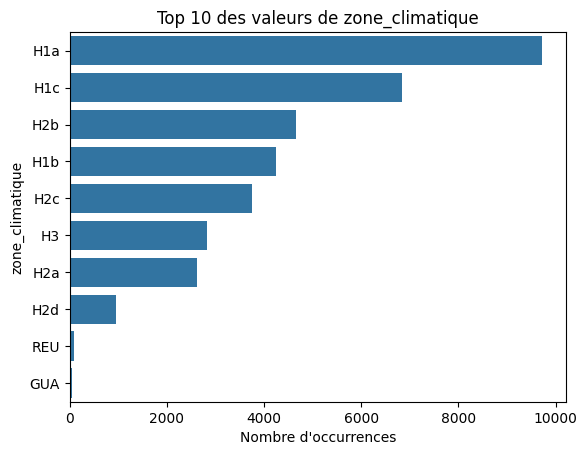


Analyse de la colonne : code_region
Valeurs uniques (20): ['01' '03' '11' '24' '28' '32' '44' '52' '53' '76']...
Valeurs manquantes : 0
Type de données : object
Top 10 des valeurs :
code_region
84    5353
11    4663
75    3759
32    3241
44    3145
76    2964
52    2522
53    2268
27    2054
28    2020
Name: count, dtype: int64


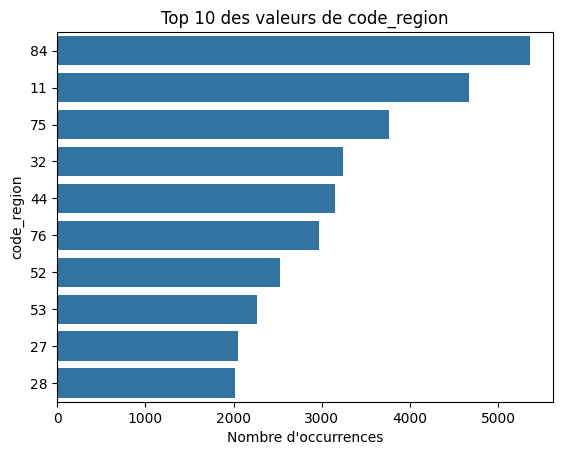


Analyse de la colonne : nom_region
Valeurs uniques (20): ['Guadeloupe' 'Guyane' 'Île-de-France' 'Centre-Val de Loire' 'Normandie'
 'Hauts-de-France' 'Grand-Est' 'Pays de la Loire' 'Bretagne' 'Occitanie']...
Valeurs manquantes : 0
Type de données : object
Top 10 des valeurs :
nom_region
Auvergne-Rhône-Alpes       5353
Île-de-France              4663
Nouvelle-Aquitaine         3759
Hauts-de-France            3241
Grand-Est                  3145
Occitanie                  2964
Pays de la Loire           2522
Bretagne                   2268
Bourgogne-Franche-Comté    2054
Normandie                  2020
Name: count, dtype: int64


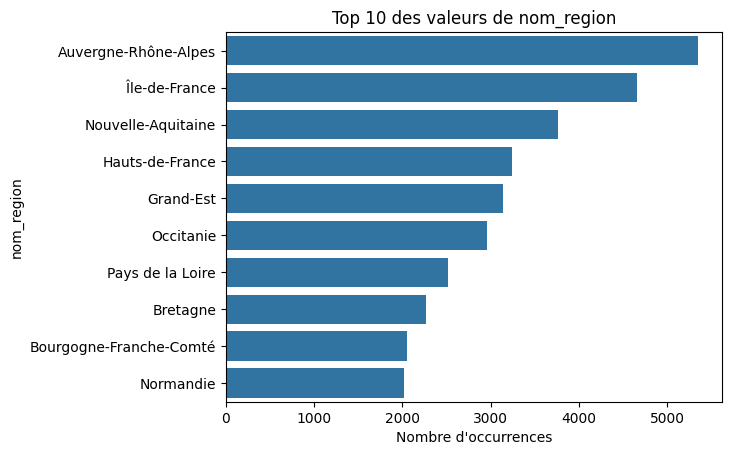


Analyse de la colonne : code_departement
Valeurs uniques (103): ['971' '973' '75' '77' '78' '91' '92' '93' '94' '95']...
Valeurs manquantes : 0
Type de données : object
Top 10 des valeurs :
code_departement
59    1259
69    1000
44     898
62     880
38     861
33     843
78     822
13     816
77     759
35     742
Name: count, dtype: int64


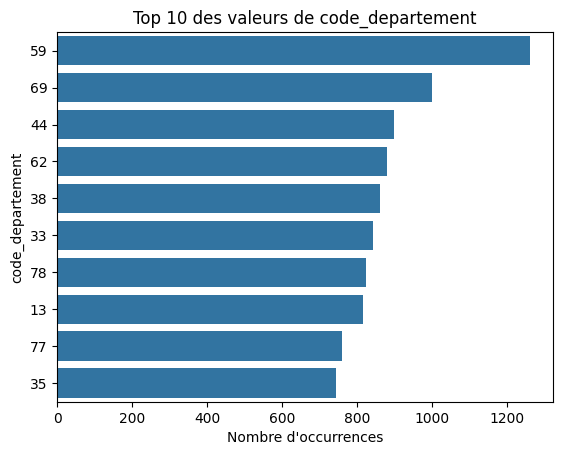


Analyse de la colonne : nom_departement
Valeurs uniques (103): ['Guadeloupe' 'Guyane' 'Paris' 'Seine-et-Marne' 'Yvelines' 'Essonne'
 'Hauts-de-Seine' 'Seine-Saint-Denis' 'Val-de-Marne' "Val-d'Oise"]...
Valeurs manquantes : 0
Type de données : object
Top 10 des valeurs :
nom_departement
Nord                1259
Rhône               1000
Loire-Atlantique     898
Pas-de-Calais        880
Isère                861
Gironde              843
Yvelines             822
Bouches-du-Rhône     816
Seine-et-Marne       759
Ille-et-Vilaine      742
Name: count, dtype: int64


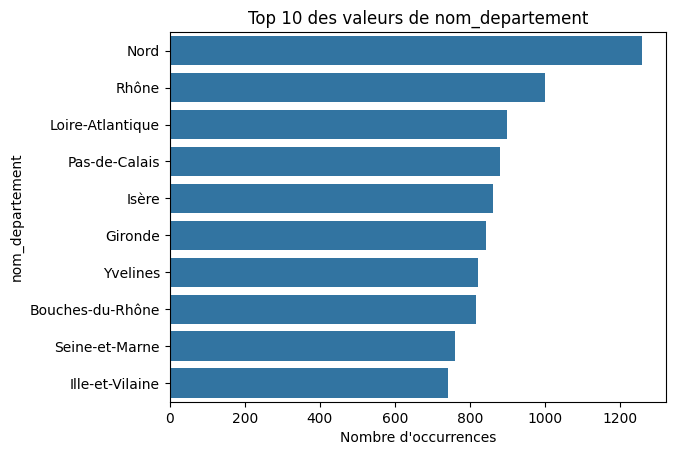


Analyse de la colonne : nom_commune
Valeurs uniques (4964): ['BAIE MAHAULT' 'BAILLIF' 'BASSE TERRE' 'LES ABYMES' 'PETIT BOURG'
 'POINTE A PITRE' 'SAINT FRANCOIS' 'CAYENNE' 'KOUROU' 'MATOURY']...
Valeurs manquantes : 0
Type de données : object
Top 10 des valeurs :
nom_commune
ND                   809
PARIS 13              73
SAINT DENIS           50
PARIS 08              34
NEUILLY SUR SEINE     32
PUTEAUX               32
NANTES                28
SAINT QUENTIN         27
BORDEAUX              27
VALENCE               27
Name: count, dtype: int64


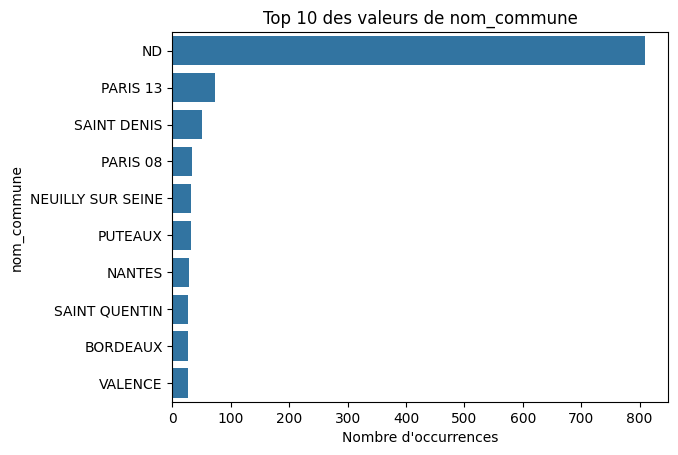


Analyse de la colonne : nombre_declaration
Valeurs uniques (423): [86  7  4 34 13  6 28  5 11 10]...
Valeurs manquantes : 0
Type de données : int64


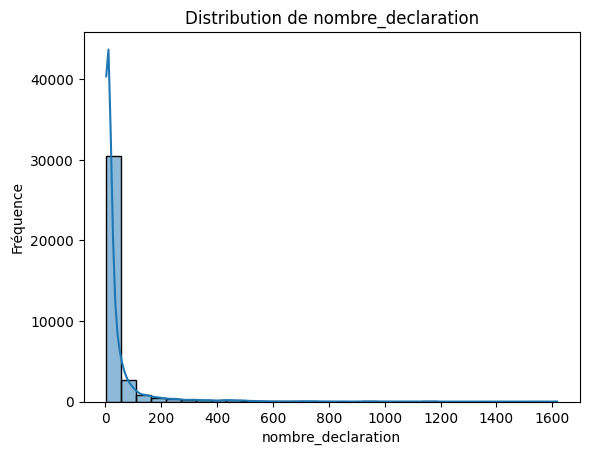


Analyse de la colonne : surface_declaree
Valeurs uniques (14617): [205643   8815   4024  88040  14890   2682   8982  60641   9575  15303]...
Valeurs manquantes : 0
Type de données : int64


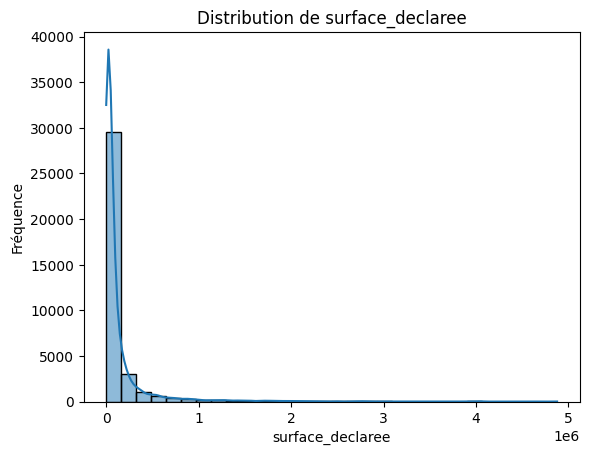


Analyse de la colonne : consommation_declaree
Valeurs uniques (18564): [38442621  1287317   699468 20281219  1302881   702277  2701468  7489990
  2381032  2417127]...
Valeurs manquantes : 0
Type de données : int64


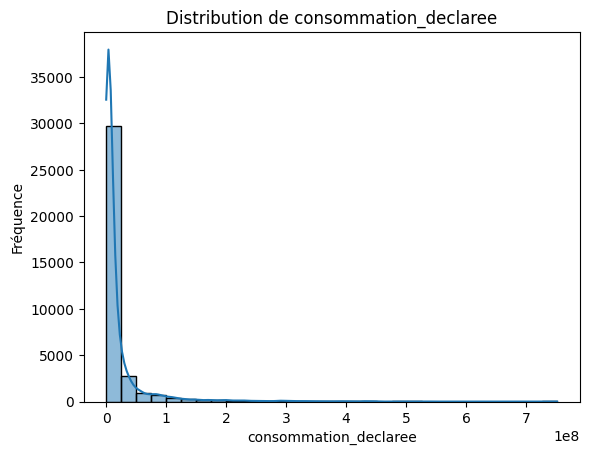


Analyse de la colonne : vecteur_energie
Valeurs uniques (7): ['Electricite' 'Gaz' 'Reseau de chaleur' 'Reseau de froid' 'Fioul' 'ND'
 'Bois']
Valeurs manquantes : 0
Type de données : object
Top 10 des valeurs :
vecteur_energie
Electricite          17301
Gaz                  12545
ND                    2596
Fioul                 1609
Reseau de chaleur     1372
Reseau de froid        182
Bois                   182
Name: count, dtype: int64


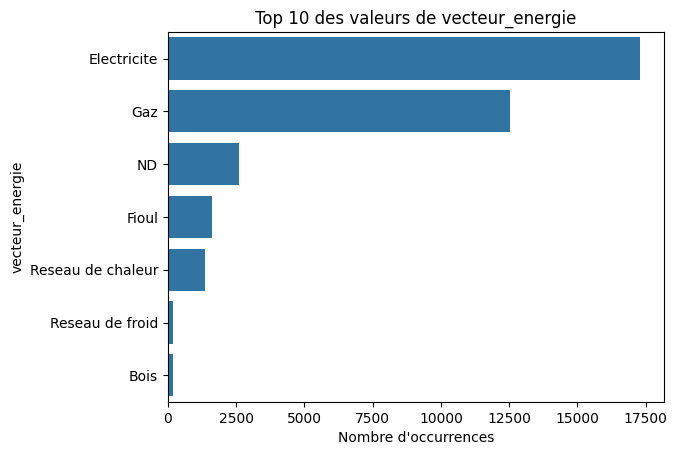


Résumé des vérifications :
Colonne : annee_consommation
  Valeurs uniques : 4
  Valeurs manquantes : 0
  Type de données : object

Colonne : zone_climatique
  Valeurs uniques : 13
  Valeurs manquantes : 0
  Type de données : object

Colonne : code_region
  Valeurs uniques : 20
  Valeurs manquantes : 0
  Type de données : object

Colonne : nom_region
  Valeurs uniques : 20
  Valeurs manquantes : 0
  Type de données : object

Colonne : code_departement
  Valeurs uniques : 103
  Valeurs manquantes : 0
  Type de données : object

Colonne : nom_departement
  Valeurs uniques : 103
  Valeurs manquantes : 0
  Type de données : object

Colonne : nom_commune
  Valeurs uniques : 4964
  Valeurs manquantes : 0
  Type de données : object

Colonne : nombre_declaration
  Valeurs uniques : 423
  Valeurs manquantes : 0
  Type de données : int64

Colonne : surface_declaree
  Valeurs uniques : 14617
  Valeurs manquantes : 0
  Type de données : int64

Colonne : consommation_declaree
  Valeurs uniques : 18

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Vérification générale
print("Aperçu général du DataFrame :")
print(df_merged_cleaned.info())
print("\nStatistiques descriptives :")
print(df_merged_cleaned.describe(include='all'))

# Initialiser un dictionnaire pour collecter les résultats
verification_results = {}

# Analyse colonne par colonne
for col in df_merged_cleaned.columns:
    print(f"\nAnalyse de la colonne : {col}")
    # Valeurs uniques
    unique_values = df_merged_cleaned[col].unique()
    print(f"Valeurs uniques ({len(unique_values)}): {unique_values[:10]}{'...' if len(unique_values) > 10 else ''}")
    
    # Vérifier les valeurs manquantes
    missing_count = df_merged_cleaned[col].isnull().sum()
    print(f"Valeurs manquantes : {missing_count}")
    
    # Vérifier les types de données
    print(f"Type de données : {df_merged_cleaned[col].dtype}")
    
    # Distribution pour les colonnes numériques
    if pd.api.types.is_numeric_dtype(df_merged_cleaned[col]):
        sns.histplot(df_merged_cleaned[col], bins=30, kde=True)
        plt.title(f"Distribution de {col}")
        plt.xlabel(col)
        plt.ylabel("Fréquence")
        plt.show()
        
    # Distribution pour les colonnes catégorielles
    elif pd.api.types.is_string_dtype(df_merged_cleaned[col]) or isinstance(df_merged_cleaned[col].dtype, pd.CategoricalDtype):
        value_counts = df_merged_cleaned[col].value_counts()
        print(f"Top 10 des valeurs :\n{value_counts.head(10)}")
        
        sns.countplot(y=df_merged_cleaned[col], order=value_counts.index[:10])
        plt.title(f"Top 10 des valeurs de {col}")
        plt.xlabel("Nombre d'occurrences")
        plt.ylabel(col)
        plt.show()
        
    # Collecter les résultats
    verification_results[col] = {
        "Valeurs uniques": len(unique_values),
        "Valeurs manquantes": missing_count,
        "Type de données": str(df_merged_cleaned[col].dtype),
    }

# Résumé final
print("\nRésumé des vérifications :")
for col, stats in verification_results.items():
    print(f"Colonne : {col}")
    for key, value in stats.items():
        print(f"  {key} : {value}")
    print()

In [76]:
df_merged_cleaned["annee_consommation"] = df_merged_cleaned["annee_consommation"].replace(0, "Année de référence")

In [77]:
# Transformer
df_merged_cleaned["nom_commune"] = df_merged_cleaned["nom_commune"].replace("ND", "Non défini")
df_merged_cleaned["vecteur_energie"] = df_merged_cleaned["vecteur_energie"].replace("ND", "Non spécifié")

In [78]:
# Supprimer les colonnes redondantes
df_merged_cleaned = df_merged_cleaned.drop(columns=["nom_region", "nom_departement"])

In [79]:
# Calcul des bornes pour la détection des outliers
q1 = df_merged_cleaned["consommation_declaree"].quantile(0.25)
q3 = df_merged_cleaned["consommation_declaree"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrer les données
df_merged_cleaned = df_merged_cleaned[
    (df_merged_cleaned["consommation_declaree"] >= lower_bound) &
    (df_merged_cleaned["consommation_declaree"] <= upper_bound)
]

In [80]:
df_merged_cleaned.to_csv("final_merged_df_cleaned.csv", index=False)

In [81]:
from sklearn.model_selection import train_test_split

# Séparer les features et la cible
X = df_merged_cleaned.drop(columns=["consommation_declaree"])
y = df_merged_cleaned["consommation_declaree"]

# Diviser en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
from sklearn.preprocessing import OneHotEncoder

# Initialiser l'encodeur One-Hot
onehot = OneHotEncoder(drop="first", sparse_output=False)

# Appliquer sur X_train
encoded_annee_train = onehot.fit_transform(X_train[["annee_consommation"]])

# Appliquer sur X_test
encoded_annee_test = onehot.transform(X_test[["annee_consommation"]])

# Ajouter les colonnes encodées
annee_columns = onehot.get_feature_names_out(["annee_consommation"])
X_train = pd.concat([X_train, pd.DataFrame(encoded_annee_train, columns=annee_columns, index=X_train.index)], axis=1)
X_test = pd.concat([X_test, pd.DataFrame(encoded_annee_test, columns=annee_columns, index=X_test.index)], axis=1)

# Supprimer la colonne originale
X_train.drop(columns=["annee_consommation"], inplace=True)
X_test.drop(columns=["annee_consommation"], inplace=True)

In [83]:
# Appliquer sur X_train
encoded_zone_train = onehot.fit_transform(X_train[["zone_climatique"]])

# Appliquer sur X_test
encoded_zone_test = onehot.transform(X_test[["zone_climatique"]])

# Ajouter les colonnes encodées
zone_columns = onehot.get_feature_names_out(["zone_climatique"])
X_train = pd.concat([X_train, pd.DataFrame(encoded_zone_train, columns=zone_columns, index=X_train.index)], axis=1)
X_test = pd.concat([X_test, pd.DataFrame(encoded_zone_test, columns=zone_columns, index=X_test.index)], axis=1)

# Supprimer la colonne originale
X_train.drop(columns=["zone_climatique"], inplace=True)
X_test.drop(columns=["zone_climatique"], inplace=True)

In [84]:
# Appliquer sur X_train
encoded_region_train = onehot.fit_transform(X_train[["code_region"]])

# Appliquer sur X_test
encoded_region_test = onehot.transform(X_test[["code_region"]])

# Récupérer les noms des colonnes encodées
region_columns = onehot.get_feature_names_out(["code_region"])

# Convertir les matrices encodées en DataFrame pandas
encoded_region_train_df = pd.DataFrame(encoded_region_train, columns=region_columns, index=X_train.index)
encoded_region_test_df = pd.DataFrame(encoded_region_test, columns=region_columns, index=X_test.index)

# Supprimer la colonne originale avant de concaténer
X_train = X_train.drop(columns=["code_region"])
X_test = X_test.drop(columns=["code_region"])

# Concaténer les colonnes encodées
X_train = pd.concat([X_train.reset_index(drop=True), encoded_region_train_df.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), encoded_region_test_df.reset_index(drop=True)], axis=1)

In [85]:
from category_encoders import TargetEncoder

# Initialiser le Target Encoder
target_enc = TargetEncoder()

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Appliquer le Target Encoding sur code_departement
X_train["code_departement_encoded"] = target_enc.fit_transform(X_train["code_departement"], y_train)

# Appliquer sur X_test avec les moyennes apprises sur X_train
X_test["code_departement_encoded"] = target_enc.transform(X_test["code_departement"])

In [86]:
# Calculer la fréquence sur l'ensemble d'entraînement
commune_frequency = X_train["nom_commune"].value_counts(normalize=True)

# Mapper les fréquences sur X_train et X_test
X_train["commune_frequency"] = X_train["nom_commune"].map(commune_frequency)
X_test["commune_frequency"] = X_test["nom_commune"].map(commune_frequency).fillna(0)

In [87]:
# Vérification des One-Hot Encodings
one_hot_variables = ["annee_consommation", "zone_climatique", "code_region"]
for var in one_hot_variables:
    encoded_columns = X_train.filter(like=var).columns
    print(f"Vérification pour {var} :")
    print(f"Colonnes encodées : {encoded_columns.tolist()}")
    print("Aperçu des valeurs (X_train) :")
    print(X_train[encoded_columns].head())
    print("Valeurs uniques (X_train) :", X_train[encoded_columns].stack().unique())
    print()

Vérification pour annee_consommation :
Colonnes encodées : ['annee_consommation_2021', 'annee_consommation_2022', 'annee_consommation_Année de référence']
Aperçu des valeurs (X_train) :
   annee_consommation_2021  annee_consommation_2022  \
0                      0.0                      0.0   
1                      1.0                      0.0   
2                      0.0                      0.0   
3                      1.0                      0.0   
4                      0.0                      1.0   

   annee_consommation_Année de référence  
0                                    1.0  
1                                    0.0  
2                                    1.0  
3                                    0.0  
4                                    0.0  
Valeurs uniques (X_train) : [0. 1.]

Vérification pour zone_climatique :
Colonnes encodées : ['zone_climatique_GUY', 'zone_climatique_H1a', 'zone_climatique_H1b', 'zone_climatique_H1c', 'zone_climatique_H2a', 'zone_climatique

In [91]:
print("Colonnes restantes dans X_train :", X_train.columns)
print("Colonnes restantes dans X_test :", X_test.columns)

Colonnes restantes dans X_train : Index(['code_departement', 'nom_commune', 'nombre_declaration',
       'surface_declaree', 'vecteur_energie', 'annee_consommation_2021',
       'annee_consommation_2022', 'annee_consommation_Année de référence',
       'zone_climatique_GUY', 'zone_climatique_H1a', 'zone_climatique_H1b',
       'zone_climatique_H1c', 'zone_climatique_H2a', 'zone_climatique_H2b',
       'zone_climatique_H2c', 'zone_climatique_H2d', 'zone_climatique_H3',
       'zone_climatique_MAR', 'zone_climatique_MAY', 'zone_climatique_REU',
       'code_region_01', 'code_region_02', 'code_region_03', 'code_region_04',
       'code_region_06', 'code_region_11', 'code_region_24', 'code_region_27',
       'code_region_28', 'code_region_32', 'code_region_44', 'code_region_52',
       'code_region_53', 'code_region_75', 'code_region_76', 'code_region_84',
       'code_region_93', 'code_region_94', 'code_region_ND',
       'code_departement_encoded', 'commune_frequency'],
      dtype='obje

In [92]:
assert list(X_train.columns) == list(X_test.columns), "Colonnes désalignées entre X_train et X_test !"

In [88]:
# Vérification du Target Encoding pour code_departement
print("Vérification du Target Encoding pour code_departement :")
print(X_train[["code_departement", "code_departement_encoded"]].head())

# Vérifie la corrélation avec la cible
correlation = X_train["code_departement_encoded"].corr(y_train)
print(f"Corrélation entre code_departement_encoded et la cible : {correlation:.2f}")

Vérification du Target Encoding pour code_departement :
  code_departement  code_departement_encoded
0               51              6.057064e+06
1               91              8.965815e+06
2               72              5.060252e+06
3               24              5.805035e+06
4               54              8.416880e+06
Corrélation entre code_departement_encoded et la cible : 0.25


In [89]:
# Vérification des fréquences pour nom_commune
print("Vérification des fréquences pour nom_commune (X_train) :")
print(X_train[["nom_commune", "commune_frequency"]].head())

print("Vérification des fréquences pour nom_commune (X_test) :")
print(X_test[X_test["commune_frequency"] == 0][["nom_commune", "commune_frequency"]].head())

# Distribution des fréquences
print("Distribution des fréquences (X_train) :")
print(X_train["commune_frequency"].describe())

Vérification des fréquences pour nom_commune (X_train) :
                 nom_commune  commune_frequency
0                 MONTMIRAIL           0.000478
1  SAINT GERMAIN LES ARPAJON           0.000239
2                   MULSANNE           0.000239
3                 LES EYZIES           0.000159
4                     POMPEY           0.000438
Vérification des fréquences pour nom_commune (X_test) :
                 nom_commune  commune_frequency
7    SAINTE JAMME SUR SARTHE                0.0
20      SAINT GERMAIN SUR AY                0.0
87     BESSINES SUR GARTEMPE                0.0
103      DONNEMARIE DONTILLY                0.0
297   ANGERVILLE LA CAMPAGNE                0.0
Distribution des fréquences (X_train) :
count    25102.000000
mean         0.000646
std          0.002741
min          0.000040
25%          0.000199
50%          0.000239
75%          0.000319
max          0.019879
Name: commune_frequency, dtype: float64


In [90]:
# Identifier les colonnes encore catégorielles
categorical_columns = X_train.select_dtypes(include=["object"]).columns
print("Colonnes encore catégorielles dans X_train :", categorical_columns)

Colonnes encore catégorielles dans X_train : Index(['code_departement', 'nom_commune', 'vecteur_energie'], dtype='object')


In [93]:
# Appliquer sur X_train et X_test
encoded_vecteur_train = onehot.fit_transform(X_train[["vecteur_energie"]])
encoded_vecteur_test = onehot.transform(X_test[["vecteur_energie"]])

# Ajouter les colonnes encodées
vecteur_columns = onehot.get_feature_names_out(["vecteur_energie"])
X_train = pd.concat([X_train, pd.DataFrame(encoded_vecteur_train, columns=vecteur_columns, index=X_train.index)], axis=1)
X_test = pd.concat([X_test, pd.DataFrame(encoded_vecteur_test, columns=vecteur_columns, index=X_test.index)], axis=1)

# Supprimer la colonne originale
X_train.drop(columns=["vecteur_energie"], inplace=True)
X_test.drop(columns=["vecteur_energie"], inplace=True)

In [94]:
print("Types des colonnes dans X_train :")
print(X_train.dtypes)

print("Valeurs manquantes dans X_train :", X_train.isnull().sum().sum())
print("Valeurs manquantes dans X_test :", X_test.isnull().sum().sum())

Types des colonnes dans X_train :
code_departement                          object
nom_commune                               object
nombre_declaration                         int64
surface_declaree                           int64
annee_consommation_2021                  float64
annee_consommation_2022                  float64
annee_consommation_Année de référence    float64
zone_climatique_GUY                      float64
zone_climatique_H1a                      float64
zone_climatique_H1b                      float64
zone_climatique_H1c                      float64
zone_climatique_H2a                      float64
zone_climatique_H2b                      float64
zone_climatique_H2c                      float64
zone_climatique_H2d                      float64
zone_climatique_H3                       float64
zone_climatique_MAR                      float64
zone_climatique_MAY                      float64
zone_climatique_REU                      float64
code_region_01                     

In [95]:
X_train.drop(columns=["code_departement", "nom_commune"], inplace=True)
X_test.drop(columns=["code_departement", "nom_commune"], inplace=True)

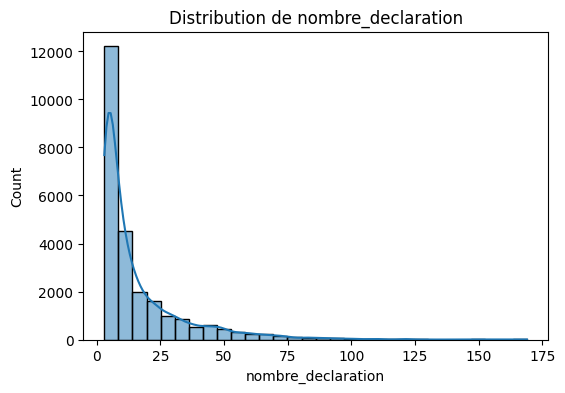

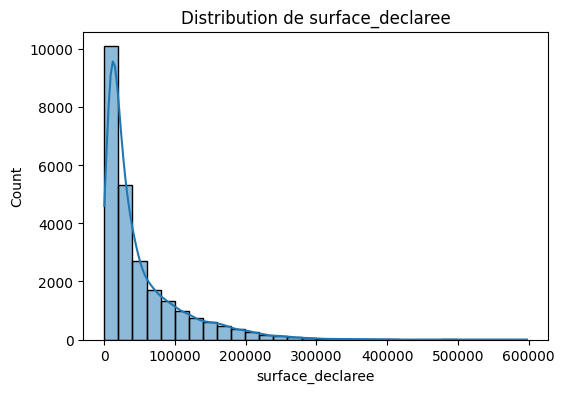

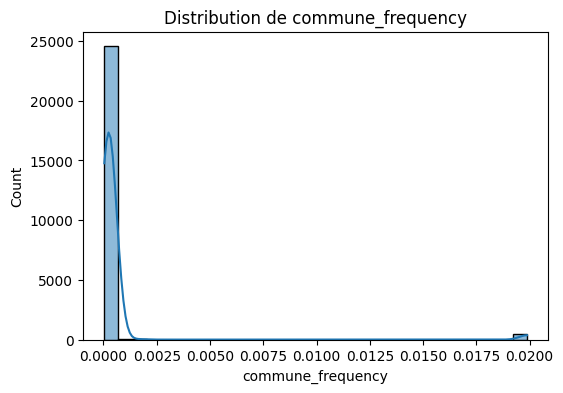

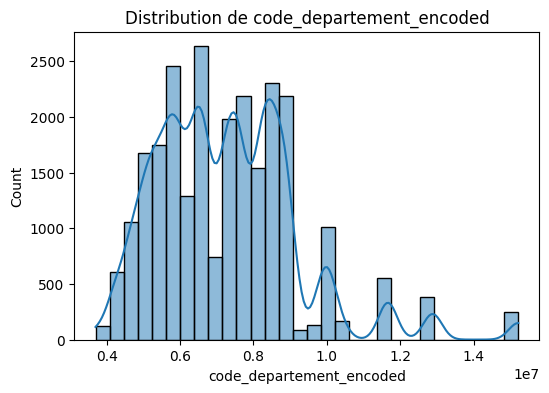

In [96]:
# Colonnes numériques à analyser
cols_to_analyze = ["nombre_declaration", "surface_declaree", "commune_frequency", "code_departement_encoded"]

# Visualisation
for col in cols_to_analyze:
    plt.figure(figsize=(6, 4))
    sns.histplot(X_train[col], kde=True, bins=30)
    plt.title(f"Distribution de {col}")
    plt.show()

In [97]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialiser les scalers
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Colonnes à transformer
columns_standard = ["nombre_declaration", "surface_declaree", "code_departement_encoded"]
columns_minmax = ["commune_frequency"]

# Appliquer la standardisation
X_train[columns_standard] = scaler_standard.fit_transform(X_train[columns_standard])
X_test[columns_standard] = scaler_standard.transform(X_test[columns_standard])

# Appliquer la normalisation
X_train[columns_minmax] = scaler_minmax.fit_transform(X_train[columns_minmax])
X_test[columns_minmax] = scaler_minmax.transform(X_test[columns_minmax])

In [98]:
# Vérifier la moyenne et l'écart type pour les colonnes standardisées
print("Moyenne et écart-type des colonnes standardisées (X_train) :")
for col in columns_standard:
    print(f"{col}: Moyenne = {X_train[col].mean():.2f}, Ecart-type = {X_train[col].std():.2f}")

# Vérifier les minimums et maximums pour les colonnes normalisées
print("\nMin et Max des colonnes normalisées (X_train) :")
for col in columns_minmax:
    print(f"{col}: Min = {X_train[col].min():.2f}, Max = {X_train[col].max():.2f}")

Moyenne et écart-type des colonnes standardisées (X_train) :
nombre_declaration: Moyenne = 0.00, Ecart-type = 1.00
surface_declaree: Moyenne = 0.00, Ecart-type = 1.00
code_departement_encoded: Moyenne = -0.00, Ecart-type = 1.00

Min et Max des colonnes normalisées (X_train) :
commune_frequency: Min = 0.00, Max = 1.00


In [99]:
# Aperçu des données transformées
print("Aperçu de X_train :")
print(X_train.head())

print("\nDimensions de X_train :", X_train.shape)
print("Dimensions de X_test :", X_test.shape)

print("\nTypes des colonnes dans X_train :")
print(X_train.dtypes)

Aperçu de X_train :
   nombre_declaration  surface_declaree  annee_consommation_2021  \
0           -0.448368         -0.236886                      0.0   
1           -0.336678          0.500740                      1.0   
2           -0.504213         -0.126760                      0.0   
3           -0.671748         -0.723467                      1.0   
4            1.003600          0.100618                      0.0   

   annee_consommation_2022  annee_consommation_Année de référence  \
0                      0.0                                    1.0   
1                      0.0                                    0.0   
2                      0.0                                    1.0   
3                      0.0                                    0.0   
4                      1.0                                    0.0   

   zone_climatique_GUY  zone_climatique_H1a  zone_climatique_H1b  \
0                  0.0                  0.0                  1.0   
1                  0

In [100]:
# Enregistrer X_train, X_test, y_train et y_test dans des fichiers séparés
X_train.to_csv("X_train_transformed.csv", index=False)
X_test.to_csv("X_test_transformed.csv", index=False)
y_train.to_csv("y_train.csv", index=False, header=True)
y_test.to_csv("y_test.csv", index=False, header=True)

print("Les fichiers transformés ont été enregistrés avec succès.")

Les fichiers transformés ont été enregistrés avec succès.


In [101]:
# Charger les fichiers enregistrés pour vérification
X_train_check = pd.read_csv("X_train_transformed.csv")
X_test_check = pd.read_csv("X_test_transformed.csv")
y_train_check = pd.read_csv("y_train.csv")
y_test_check = pd.read_csv("y_test.csv")

# Vérifier les dimensions
print("Dimensions après chargement :")
print("X_train :", X_train_check.shape)
print("X_test :", X_test_check.shape)
print("y_train :", y_train_check.shape)
print("y_test :", y_test_check.shape)

Dimensions après chargement :
X_train : (25102, 44)
X_test : (6276, 44)
y_train : (25102, 1)
y_test : (6276, 1)


# Entrainement initial des modèles

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Charger les fichiers sauvegardés
X_train = pd.read_csv("X_train_transformed.csv")
X_test = pd.read_csv("X_test_transformed.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")

# Redimensionner y_train et y_test s'ils ont une seule colonne
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Initialiser une fonction pour afficher les métriques
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"--- {model_name} ---")
    print(f"MAE : {mae:.2f}")
    print(f"MSE : {mse:.2f}")
    print(f"R² : {r2:.2f}\n")

# 1. Régression linéaire
print("Entraînement du modèle : Régression Linéaire")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
evaluate_model(lr_model, X_test, y_test, "Régression Linéaire")

# 2. Forêt aléatoire
print("Entraînement du modèle : Forêt Aléatoire")
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
evaluate_model(rf_model, X_test, y_test, "Forêt Aléatoire")

# 3. Gradient Boosting
print("Entraînement du modèle : Gradient Boosting")
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
evaluate_model(gb_model, X_test, y_test, "Gradient Boosting")

Entraînement du modèle : Régression Linéaire
--- Régression Linéaire ---
MAE : 1966594.22
MSE : 10011800729434.31
R² : 0.83

Entraînement du modèle : Forêt Aléatoire
--- Forêt Aléatoire ---
MAE : 801607.90
MSE : 2309206146785.53
R² : 0.96

Entraînement du modèle : Gradient Boosting
--- Gradient Boosting ---
MAE : 1585287.96
MSE : 6580888468521.57
R² : 0.89



# Création de la base de données SQLite avec sqlalchemy

In [1]:
from sqlalchemy import create_engine, Column, Integer, Float, String
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker
import pandas as pd
import numpy as np
import os

# Supprimer la base existante si elle existe
if os.path.exists("energy_consumption.db"):
    os.remove("energy_consumption.db")

# Déclaration de la base et des tables
Base = declarative_base()

class TrainData(Base):
    __tablename__ = "train_data"
    id = Column(Integer, primary_key=True, autoincrement=True)
    nombre_declaration = Column(Float)
    surface_declaree = Column(Float)
    annee_consommation_2021 = Column(Float)
    annee_consommation_2022 = Column(Float)
    annee_consommation_reference = Column(Float)
    consommation_declaree = Column(Integer)
    densite_energetique = Column(Float)
    ratio_declaration_consommation = Column(Float)
    consommation_relative_climat = Column(Float)
    surface_par_declaration = Column(Float)
    consommation_log = Column(Float)
    consommation_anormale = Column(String)

class TestData(Base):
    __tablename__ = "test_data"
    id = Column(Integer, primary_key=True, autoincrement=True)
    nombre_declaration = Column(Float)
    surface_declaree = Column(Float)
    annee_consommation_2021 = Column(Float)
    annee_consommation_2022 = Column(Float)
    annee_consommation_reference = Column(Float)
    consommation_declaree = Column(Integer)
    densite_energetique = Column(Float)
    ratio_declaration_consommation = Column(Float)
    consommation_relative_climat = Column(Float)
    surface_par_declaration = Column(Float)
    consommation_log = Column(Float)
    consommation_anormale = Column(String)

# Création de la base de données SQLite
engine = create_engine("sqlite:///energy_consumption.db")
Base.metadata.create_all(engine)
Session = sessionmaker(bind=engine)
session = Session()

# Charger les données
X_train = pd.read_csv("X_train_transformed.csv")
X_test = pd.read_csv("X_test_transformed.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")

# Ajouter la colonne annee_consommation_reference
X_train["annee_consommation_reference"] = X_train[["annee_consommation_2021", "annee_consommation_2022"]].mean(axis=1)
X_test["annee_consommation_reference"] = X_test[["annee_consommation_2021", "annee_consommation_2022"]].mean(axis=1)

# Calcul des colonnes supplémentaires
for df, y_df in [(X_train, y_train), (X_test, y_test)]:
    df["densite_energetique"] = df.apply(
        lambda row: np.nan if row["surface_declaree"] == 0 else y_df.loc[row.name, "consommation_declaree"] / row["surface_declaree"],
        axis=1
    )
    df["ratio_declaration_consommation"] = y_df["consommation_declaree"] / df["nombre_declaration"]
    df["consommation_relative_climat"] = y_df["consommation_declaree"] / df["annee_consommation_reference"]
    df["surface_par_declaration"] = df["surface_declaree"] / df["nombre_declaration"]
    df["consommation_log"] = np.log1p(y_df["consommation_declaree"])
    df["consommation_anormale"] = np.where(
        df["densite_energetique"] > df["densite_energetique"].mean() + 3 * df["densite_energetique"].std(),
        "Anormale",
        "Normale"
    )

# Insérer les données dans train_data
for i, row in X_train.iterrows():
    train_entry = TrainData(
        nombre_declaration=row["nombre_declaration"],
        surface_declaree=row["surface_declaree"],
        annee_consommation_2021=row["annee_consommation_2021"],
        annee_consommation_2022=row["annee_consommation_2022"],
        annee_consommation_reference=row["annee_consommation_reference"],
        consommation_declaree=int(y_train.loc[i, "consommation_declaree"]),
        densite_energetique=row["densite_energetique"],
        ratio_declaration_consommation=row["ratio_declaration_consommation"],
        consommation_relative_climat=row["consommation_relative_climat"],
        surface_par_declaration=row["surface_par_declaration"],
        consommation_log=row["consommation_log"],
        consommation_anormale=row["consommation_anormale"],
    )
    session.add(train_entry)

# Insérer les données dans test_data
for i, row in X_test.iterrows():
    test_entry = TestData(
        nombre_declaration=row["nombre_declaration"],
        surface_declaree=row["surface_declaree"],
        annee_consommation_2021=row["annee_consommation_2021"],
        annee_consommation_2022=row["annee_consommation_2022"],
        annee_consommation_reference=row["annee_consommation_reference"],
        consommation_declaree=int(y_test.loc[i, "consommation_declaree"]),
        densite_energetique=row["densite_energetique"],
        ratio_declaration_consommation=row["ratio_declaration_consommation"],
        consommation_relative_climat=row["consommation_relative_climat"],
        surface_par_declaration=row["surface_par_declaration"],
        consommation_log=row["consommation_log"],
        consommation_anormale=row["consommation_anormale"],
    )
    session.add(test_entry)

# Commit des changements
session.commit()

# Fermeture de la session
session.close()
print("Les données ont été insérées avec succès avec les nouvelles colonnes.")

C:\Users\aboys\AppData\Local\Temp\ipykernel_23044\3493074519.py:13: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base()


Les données ont été insérées avec succès avec les nouvelles colonnes.


In [3]:
from sqlalchemy import create_engine, inspect, text
from sqlalchemy.orm import sessionmaker
import pandas as pd

# Connexion à la base de données
engine = create_engine("sqlite:///energy_consumption.db")
Session = sessionmaker(bind=engine)
session = Session()

# Vérifier les tables dans la base de données
inspector = inspect(engine)
tables = inspector.get_table_names()
print("Tables présentes dans la base de données :", tables)

# Vérifier le schéma des tables
for table in tables:
    print(f"\nSchéma de la table {table}:")
    columns = inspector.get_columns(table)
    for column in columns:
        print(f"- {column['name']} ({column['type']})")

# Vérifier le contenu des tables avec un aperçu des données
print("\nAperçu de la table train_data :")
train_data_preview = pd.read_sql_query("SELECT * FROM train_data LIMIT 5", engine)
print(train_data_preview)

print("\nAperçu de la table test_data :")
test_data_preview = pd.read_sql_query("SELECT * FROM test_data LIMIT 5", engine)
print(test_data_preview)

# Vérifier les dimensions des tables
print("\nDimensions des tables :")
for table in tables:
    count = session.execute(text(f"SELECT COUNT(*) FROM {table}")).scalar()
    print(f"{table} : {count} lignes")

# Vérifier les valeurs des colonnes calculées
print("\nStatistiques sur les colonnes supplémentaires (train_data) :")
train_data_stats = pd.read_sql_query(
    "SELECT AVG(densite_energetique) AS avg_density, AVG(ratio_declaration_consommation) AS avg_ratio FROM train_data",
    engine
)
print(train_data_stats)

print("\nStatistiques sur les colonnes supplémentaires (test_data) :")
test_data_stats = pd.read_sql_query(
    "SELECT AVG(densite_energetique) AS avg_density, AVG(ratio_declaration_consommation) AS avg_ratio FROM test_data",
    engine
)
print(test_data_stats)

# Fermer la session
session.close()

Tables présentes dans la base de données : ['test_data', 'train_data']

Schéma de la table test_data:
- id (INTEGER)
- nombre_declaration (FLOAT)
- surface_declaree (FLOAT)
- annee_consommation_2021 (FLOAT)
- annee_consommation_2022 (FLOAT)
- annee_consommation_reference (FLOAT)
- consommation_declaree (INTEGER)
- densite_energetique (FLOAT)
- ratio_declaration_consommation (FLOAT)
- consommation_relative_climat (FLOAT)
- surface_par_declaration (FLOAT)
- consommation_log (FLOAT)
- consommation_anormale (VARCHAR)

Schéma de la table train_data:
- id (INTEGER)
- nombre_declaration (FLOAT)
- surface_declaree (FLOAT)
- annee_consommation_2021 (FLOAT)
- annee_consommation_2022 (FLOAT)
- annee_consommation_reference (FLOAT)
- consommation_declaree (INTEGER)
- densite_energetique (FLOAT)
- ratio_declaration_consommation (FLOAT)
- consommation_relative_climat (FLOAT)
- surface_par_declaration (FLOAT)
- consommation_log (FLOAT)
- consommation_anormale (VARCHAR)

Aperçu de la table train_data :

## Test requêtes SQL